In [20]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold

In [3]:
sentiment_raw = pd.read_csv('amazon_cells_labelled.txt', delimiter= '\t', header=None)
sentiment_raw.columns = ['message', 'label']

# Classifier Version 1

In [5]:
keywords = ['good', 'great', 'ideal', 'nice', 'excellent', 'highly','loved','best',
            'poor','worthless','disappointed','trouble','not']

for key in keywords:
    # Note that I removed the spaces around the key, because it misses at the beginning or end of comments
    # and removing the spaces improved results
    sentiment_raw[str(key)] = sentiment_raw.message.str.contains(str(key), case=False)

In [6]:
sentiment_raw

,message,label,good,great,ideal,nice,excellent,highly,loved,best,poor,worthless,disappointed,trouble,not
0,So there is no way for me to plug it in here i...,0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,"Good case, Excellent value.",1,True,False,False,False,True,False,False,False,False,False,False,False,False
2,Great for the jawbone.,1,False,True,False,False,False,False,False,False,False,False,False,False,False
3,Tied to charger for conversations lasting more...,0,False,False,False,False,False,False,False,False,False,False,False,False,False
4,The mic is great.,1,False,True,False,False,False,False,False,False,False,False,False,False,False
5,I have to jiggle the plug to get it to line up...,0,False,False,False,False,False,False,False,False,False,False,False,False,False
6,If you have several dozen or several hundred c...,0,False,False,False,False,False,False,False,False,False,False,False,False,False
7,If you are Razr owner...you must have this!,1,False,False,False,False,False,False,False,False,False,False,False,False,False
8,"Needless to say, I wasted my money.",0,False,False,False,False,False,False,False,False,False,False,False,False,False
9,What a waste of money and time!.,0,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
# Brief write-up of feature engineering:
# I initially chose to select for positive reviews using words like 'good' and 'great,' because it seemed to me that negative
# reviews can tend to be less direct and more varied. 
# However, it occurred to me that it would also be possible to add in another feature to the same model
# based on obviously negative remarks.

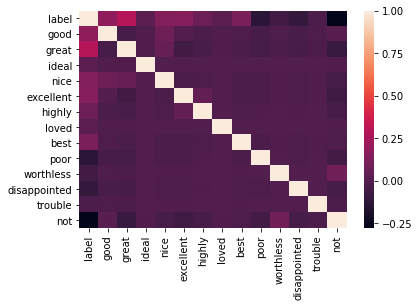

In [8]:
sns.heatmap(sentiment_raw.corr())

In [9]:
data = sentiment_raw[keywords]
target = sentiment_raw['label']
# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 304


In [10]:
confusion_matrix(target, y_pred)

array([[485,  15],
       [289, 211]])

# Classifier Version 2

In [11]:
keywords = ['good', 'great', 'ideal', 'nice', 'excellent', 'highly','loved','best',
            'junk','never','blew up','unsatisfactory','waste','fails',
            'poor','worthless','disappointed','trouble','not']
for key in keywords:
    sentiment_raw[str(key)] = sentiment_raw.message.str.contains(str(key), case=False)
data = sentiment_raw[keywords]
target = sentiment_raw['label']
# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 304


In [12]:
confusion_matrix(target, y_pred)

array([[485,  15],
       [289, 211]])

# Classifier Version 3

In [13]:
keywords = ['good', 'great', 'ideal', 'nice', 'excellent', 'highly','loved','best',
            'fine','sweetest','excellent','happy','wow','satisfied','cool',
            'junk','never','blew up','unsatisfactory','waste','fails',
            'poor','worthless','disappointed','trouble','not']
for key in keywords:
    sentiment_raw[str(key)] = sentiment_raw.message.str.contains(str(key), case=False)
data = sentiment_raw[keywords]
target = sentiment_raw['label']
# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 278


In [14]:
confusion_matrix(target, y_pred)

array([[481,  19],
       [259, 241]])

# Classifier Version 4

In [15]:
keywords = ['good', 'great', 'ideal', 'nice', 'excellent', 'highly','loved','best',
            'fine','sweetest','excellent','happy','wow','satisfied','cool',
            'darn','return','refund','wrong','joke','failed','dead','uncomfortable',
            'junk','never','blew up','unsatisfactory','waste','fails',
            'poor','worthless','disappointed','trouble','not']
for key in keywords:
    sentiment_raw[str(key)] = sentiment_raw.message.str.contains(str(key), case=False)
data = sentiment_raw[keywords]
target = sentiment_raw['label']
# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 278


In [16]:
confusion_matrix(target, y_pred)

array([[481,  19],
       [259, 241]])

# Classifier Version 5

In [17]:
keywords = ['good', 'great', 'ideal', 'nice', 'excellent', 'highly','loved','best',
            'fine','sweetest','excellent','happy','wow','satisfied','cool',
            'recommend','comfortable','perfect','simple','strong','easy',
            'darn','return','refund','wrong','joke','failed','dead','uncomfortable',
            'junk','never','blew up','unsatisfactory','waste','fails',
            'poor','worthless','disappointed','trouble','not']
for key in keywords:
    sentiment_raw[str(key)] = sentiment_raw.message.str.contains(str(key), case=False)
data = sentiment_raw[keywords]
target = sentiment_raw['label']
# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 241


In [18]:
confusion_matrix(target, y_pred)

array([[473,  27],
       [214, 286]])

# Cross Validation of Version 5

In [25]:
kf = KFold(n_splits=4)
for train, test in kf.split(sentiment_raw):
    print("%s %s" % (train, test))

[250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267
 268 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285
 286 287 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303
 304 305 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321
 322 323 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339
 340 341 342 343 344 345 346 347 348 349 350 351 352 353 354 355 356 357
 358 359 360 361 362 363 364 365 366 367 368 369 370 371 372 373 374 375
 376 377 378 379 380 381 382 383 384 385 386 387 388 389 390 391 392 393
 394 395 396 397 398 399 400 401 402 403 404 405 406 407 408 409 410 411
 412 413 414 415 416 417 418 419 420 421 422 423 424 425 426 427 428 429
 430 431 432 433 434 435 436 437 438 439 440 441 442 443 444 445 446 447
 448 449 450 451 452 453 454 455 456 457 458 459 460 461 462 463 464 465
 466 467 468 469 470 471 472 473 474 475 476 477 478 479 480 481 482 483
 484 485 486 487 488 489 490 491 492 493 494 495 49

In [26]:
for train, test in kf.split(sentiment_raw):
    data = sentiment_raw.iloc[train,keywords]
    target = sentiment_raw.iloc[test,'label']
    bnb = BernoulliNB()
    bnb.fit(data, target)
    y_pred = bnb.predict(data)
    print("Number of mislabeled points out of a total {} points : {}".format(data.shape[0],(target != y_pred).sum()))

TypeError: cannot perform reduce with flexible type